In [ ]:
!pip3 install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 831.4 MB 13 kB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 1.9 MB 5.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.0+cu116
    Uninstalling torchaudio-0.13.0+cu116:
      Successfully uninstalled torchaudio-0.13.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [ ]:
# Import MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                            train=True,
                                       transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           transform=transforms.ToTensor())

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=batch_size,
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

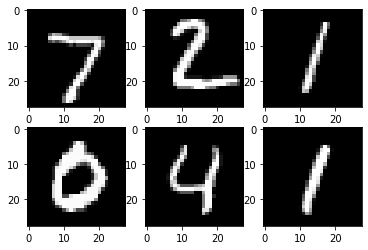

In [ ]:
examples = iter(test_loader)
example_data, example_targets = examples.next()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [ ]:
# 2 layer multi layer feedforward network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/600], Loss: 0.4666
Epoch [1/10], Step [200/600], Loss: 0.3426
Epoch [1/10], Step [300/600], Loss: 0.2437
Epoch [1/10], Step [400/600], Loss: 0.1858
Epoch [1/10], Step [500/600], Loss: 0.2852
Epoch [1/10], Step [600/600], Loss: 0.1561
Epoch [2/10], Step [100/600], Loss: 0.1643
Epoch [2/10], Step [200/600], Loss: 0.1477
Epoch [2/10], Step [300/600], Loss: 0.0710
Epoch [2/10], Step [400/600], Loss: 0.1168
Epoch [2/10], Step [500/600], Loss: 0.1137
Epoch [2/10], Step [600/600], Loss: 0.2105
Epoch [3/10], Step [100/600], Loss: 0.0735
Epoch [3/10], Step [200/600], Loss: 0.0378
Epoch [3/10], Step [300/600], Loss: 0.0834
Epoch [3/10], Step [400/600], Loss: 0.0494
Epoch [3/10], Step [500/600], Loss: 0.0377
Epoch [3/10], Step [600/600], Loss: 0.0487
Epoch [4/10], Step [100/600], Loss: 0.0385
Epoch [4/10], Step [200/600], Loss: 0.0250
Epoch [4/10], Step [300/600], Loss: 0.0917
Epoch [4/10], Step [400/600], Loss: 0.0472
Epoch [4/10], Step [500/600], Loss: 0.0146
Epoch [4/10

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 98.05 %
